In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

### Loading the data

In [2]:
df1=pd.read_csv("C:\\Users\\Masooma\\Heart Disease data.csv")

In [3]:
df1.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Attribute Information:

age
sex
chest pain type (0 = typical angina; 1 = atypical angina; 2 = non-angina pain; 3 = asymptomatic)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
resting electrocardiographic results (Resting electrocardiographic results: 0 = normal; 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
maximum heart rate achieved
exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2= upsloping)
number of major vessels (0-3) colored by flourosopy
thal: 1 = fixed defect; 2 = normal; 3=reversable defect

In [4]:
df=df1.copy()

### Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
duplicate_rows = df[df.duplicated()]

duplicate_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
for i in df.columns:
    print(f"\n",df[i].value_counts().sort_index())
    
for i in df.columns:
    print(f"\n{i}\n",df[i].isnull().sum())
    


 age
29     1
34     2
35     4
37     2
38     2
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    11
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68     4
69     3
70     4
71     3
74     1
76     1
77     1
Name: count, dtype: int64

 sex
0     96
1    206
Name: count, dtype: int64

 cp
0    143
1     50
2     86
3     23
Name: count, dtype: int64

 trestbps
94      2
100     4
101     1
102     2
104     1
105     3
106     1
108     6
110    19
112     9
114     1
115     3
117     1
118     7
120    37
122     4
123     1
124     6
125    11
126     3
128    12
129     1
130    36
132     8
134     5
135     6
136     3
138    12
140    32
142     3
144     2
145     5
146     2
148     2
150    17
152     5
154     1
155     1
156     1
160    11
164     1
165     1
170     4
172     1
174     1
178     2
180     3
1

### Data Cleaning

In [10]:
df.loc[df['ca']==4, 'ca']=np.NaN
df.loc[df['thal']==0,'thal']=np.NaN
print(df['ca'].unique())
print(df['thal'].unique())

[ 2.  0.  1.  3. nan]
[ 3.  2.  1. nan]


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,298.000000,300.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.674497,2.330000,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.938202,0.585014,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [13]:
df['ca']=df['ca'].fillna(df['ca'].mode()[0])
df['thal']=df['thal'].fillna(df['thal'].mode()[0])
print(df['ca'].unique())
print(df['thal'].unique())

[2. 0. 1. 3.]
[3. 2. 1.]


In [14]:
#missing values treated now

### Renaming the columns

In [15]:
new_names=['age', 'sex', 'chest_pain', 'resting_bp', 'cholestrol', 'fasting_bsugar', 'resting_ECG', 
          'Max_heart_rate','ex_angina', 'oldpeak', 'slope', 'No_maj_vessels', 'thalassemia', 'target']
df.columns=new_names
df.columns

Index(['age', 'sex', 'chest_pain', 'resting_bp', 'cholestrol',
       'fasting_bsugar', 'resting_ECG', 'Max_heart_rate', 'ex_angina',
       'oldpeak', 'slope', 'No_maj_vessels', 'thalassemia', 'target'],
      dtype='object')

### Checking for Outliers

In [16]:
categorical=['sex', 'chest_pain', 'fasting_bsugar', 'resting_ECG',
       'ex_angina', 'slope', 'thalassemia', 'target','No_maj_vessels']

numerical=['age','resting_bp', 'cholestrol','Max_heart_rate','oldpeak']

age                  Axes(0.125,0.53;0.0945122x0.35)
sex               Axes(0.238415,0.53;0.0945122x0.35)
chest_pain        Axes(0.351829,0.53;0.0945122x0.35)
resting_bp        Axes(0.465244,0.53;0.0945122x0.35)
cholestrol        Axes(0.578659,0.53;0.0945122x0.35)
fasting_bsugar    Axes(0.692073,0.53;0.0945122x0.35)
resting_ECG       Axes(0.805488,0.53;0.0945122x0.35)
Max_heart_rate       Axes(0.125,0.11;0.0945122x0.35)
ex_angina         Axes(0.238415,0.11;0.0945122x0.35)
oldpeak           Axes(0.351829,0.11;0.0945122x0.35)
slope             Axes(0.465244,0.11;0.0945122x0.35)
No_maj_vessels    Axes(0.578659,0.11;0.0945122x0.35)
thalassemia       Axes(0.692073,0.11;0.0945122x0.35)
target            Axes(0.805488,0.11;0.0945122x0.35)
dtype: object

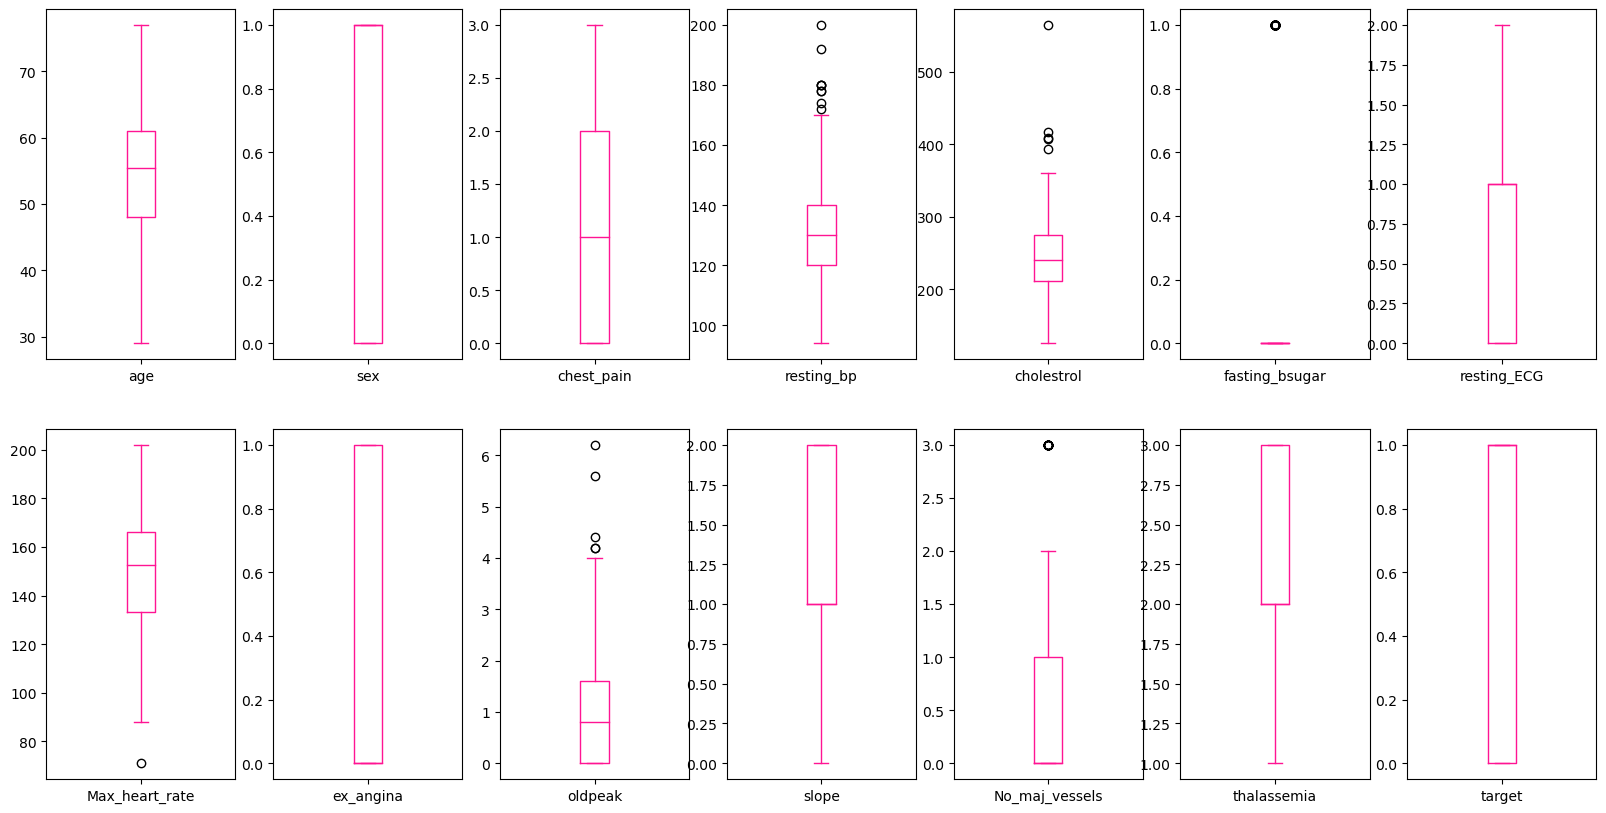

In [17]:
# Plotting Boxplot 

df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink')

In [18]:
#Calculating no of outliers in numerical column

bounds={}
outliers= {}

for col in numerical:
    # Calculating Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculating the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Storing the bounds in the dictionary
    bounds[col] = (lower_bound, upper_bound)

    
    # Finding outliers
    outliers[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

# Displaying the number of outliers for each column
for col, count in outliers.items():
    print(f"{col}: {count} outliers")


age: 0 outliers
resting_bp: 9 outliers
cholestrol: 5 outliers
Max_heart_rate: 1 outliers
oldpeak: 5 outliers


In [19]:
# Removing outliers

def remove_outlier(df, column, bounds):
    lower_bound, upper_bound = bounds[column]
    # Create a boolean mask to filter out the outliers
    mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)
    return df[mask]


numerical = ['age', 'resting_bp', 'cholestrol', 'Max_heart_rate', 'oldpeak']

# Removing outliers for numerical columns
for column in numerical:
    df = remove_outlier(df, column, bounds)
    
# printing cleaned dataframe  
df

,age,sex,chest_pain,resting_bp,cholestrol,fasting_bsugar,resting_ECG,Max_heart_rate,ex_angina,oldpeak,slope,No_maj_vessels,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3.0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3.0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3.0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3.0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0.0,2.0,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0.0,2.0,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1.0,3.0,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0.0,2.0,0


### Data Analysis

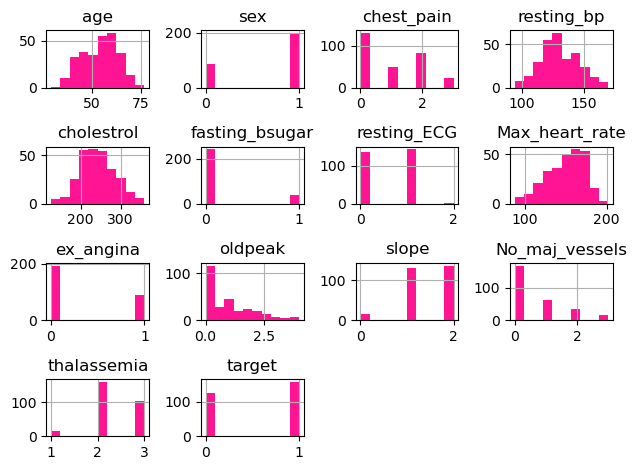

In [20]:
#Plotting histograms

df.hist(color='deeppink')
plt.tight_layout()

plt.show()

### Correlation Analysis

<Axes: >

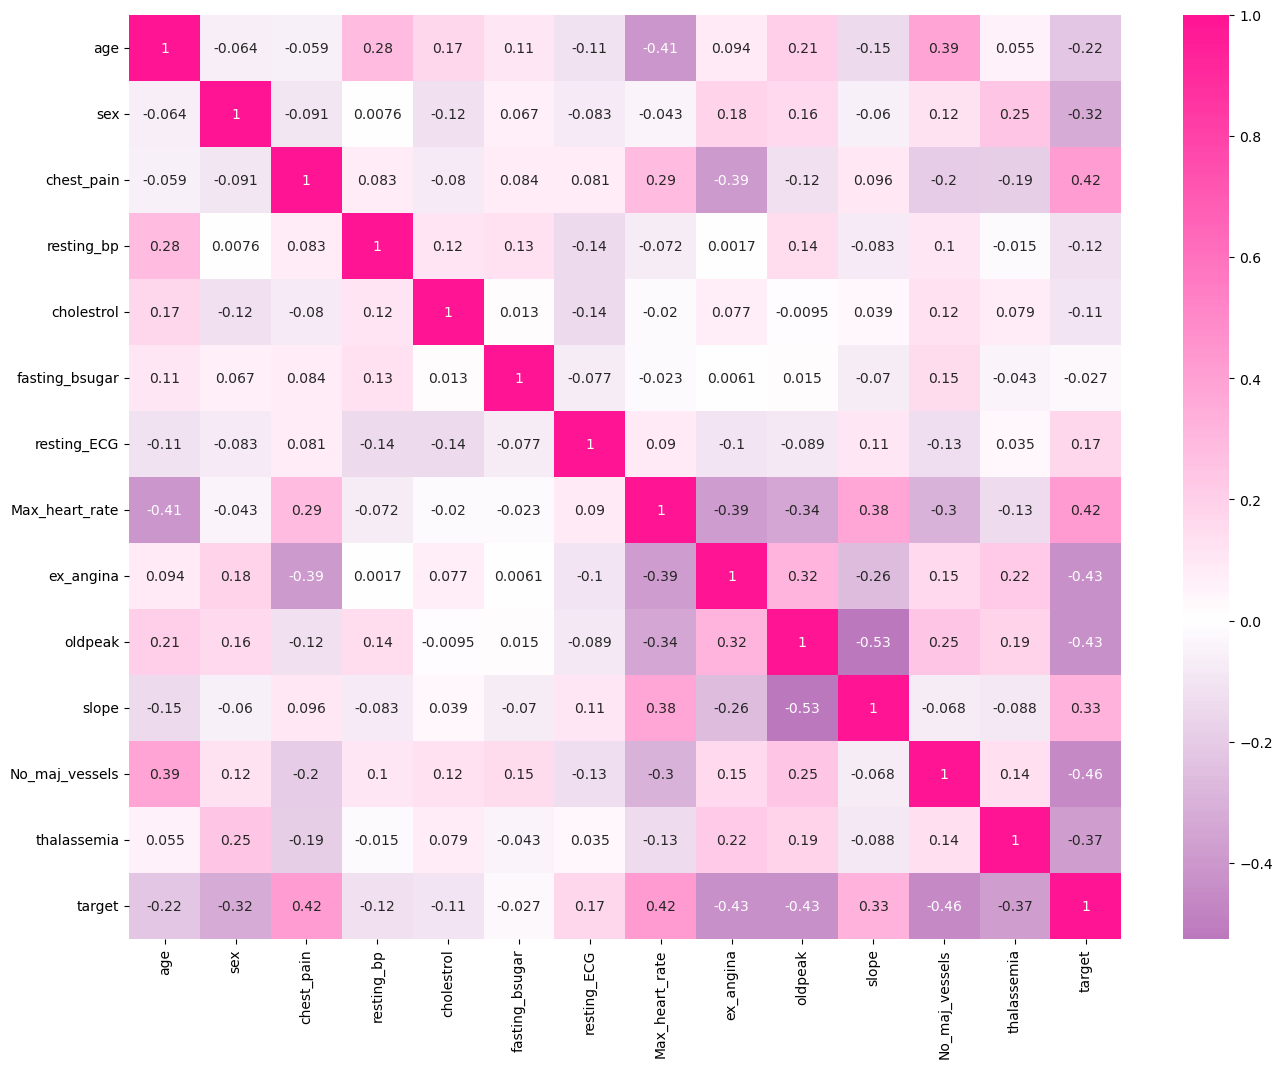

In [21]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(16, 12)) 

custom_palette = LinearSegmentedColormap.from_list("custom", ["purple","white", "deeppink"])

sns.heatmap(df.corr(),annot=True,cmap=custom_palette,center=0)

<Axes: xlabel='target', ylabel='count'>

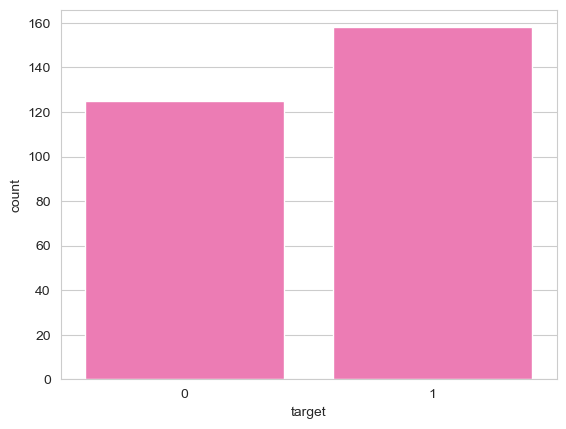

In [22]:
# checking for balancedness in data

sns.set_style('whitegrid')
sns.countplot(x='target',data=df, color="#ff69b4")

Target variable seems to be balanced

### Mapping values for graphical representation

In [23]:
#mapping the values

df['target'] = df.target.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['chest_pain'] = df.chest_pain.replace({0: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "asymtomatic"})

df['resting_ECG']=df.resting_ECG.replace({0 : 'normal', 1:  'ST-T abnormality',
2: 'left ventricular hypertrophy'})
df['ex_angina'] = df.ex_angina.replace({1: "Yes", 0: "No"})
df['fasting_bsugar'] = df.fasting_bsugar.replace({1: "True", 0: "False"})
df['slope'] = df.slope.replace({0: "upsloping", 1: "flat",2:"downsloping"})
df['thalassemia'] = df.thalassemia.replace({1: "fixed_defect", 2:"normal" , 3:"reversable_defect"})

df

,age,sex,chest_pain,resting_bp,cholestrol,fasting_bsugar,resting_ECG,Max_heart_rate,ex_angina,oldpeak,slope,No_maj_vessels,thalassemia,target
0,52,Male,typical_angina,125,212,False,ST-T abnormality,168,No,1.0,downsloping,2.0,reversable_defect,No_disease
1,53,Male,typical_angina,140,203,True,normal,155,Yes,3.1,upsloping,0.0,reversable_defect,No_disease
2,70,Male,typical_angina,145,174,False,ST-T abnormality,125,Yes,2.6,upsloping,0.0,reversable_defect,No_disease
3,61,Male,typical_angina,148,203,False,ST-T abnormality,161,No,0.0,downsloping,1.0,reversable_defect,No_disease
4,62,Female,typical_angina,138,294,True,ST-T abnormality,106,No,1.9,flat,3.0,normal,No_disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,Female,non-anginal pain,120,211,False,normal,115,No,1.5,flat,0.0,normal,Disease
733,44,Female,non-anginal pain,108,141,False,ST-T abnormality,175,No,0.6,flat,0.0,normal,Disease
739,52,Male,typical_angina,128,255,False,ST-T abnormality,161,Yes,0.0,downsloping,1.0,reversable_defect,No_disease
843,59,Male,asymtomatic,160,273,False,normal,125,No,0.0,downsloping,0.0,normal,No_disease


### Correcting Datatype

In [24]:

df[categorical]=df[categorical].astype(str)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 0 to 878
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             283 non-null    int64  
 1   sex             283 non-null    object 
 2   chest_pain      283 non-null    object 
 3   resting_bp      283 non-null    int64  
 4   cholestrol      283 non-null    int64  
 5   fasting_bsugar  283 non-null    object 
 6   resting_ECG     283 non-null    object 
 7   Max_heart_rate  283 non-null    int64  
 8   ex_angina       283 non-null    object 
 9   oldpeak         283 non-null    float64
 10  slope           283 non-null    object 
 11  No_maj_vessels  283 non-null    object 
 12  thalassemia     283 non-null    object 
 13  target          283 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 33.2+ KB


In [28]:
# Exporting DataFrame to CSV file for Amazon Featured Data

df.to_csv('Heart Disease dataset2.csv')